# LSTMs, GRUs, and...?

Yep, this is part 2 of the RNN

## Sequence Learning 
Many real world problems deal with **inputs/outputs with varying sizes** 

For sequences, we do NOT want to learn different weights for every token. 

- RNNs use a **shared neural network** to updatehidden state. 
- We reuse the RNN modulefor every token in the sequence 
- We keep the CONTEXT of the previous tokens encoded in the hidden state. 
 

## Shallowness of RNN 

If we consider the concatenated input/hidden and output/hidden vectors as simply **input/output**, forward path in RNN is simply a **fully-connected NN**. 

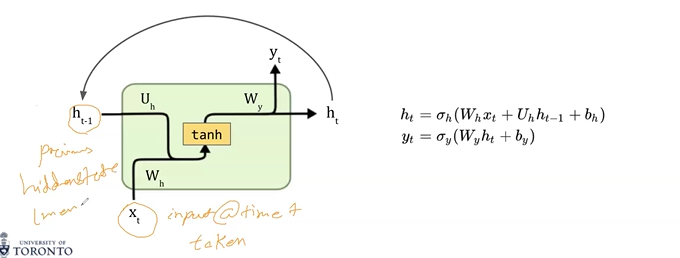

The RNN at each step has two inputs, the hidden state and input @ time + token 

$W_h$ should be a 64x50 matrix, and $U_h$ should be 64x64, if the hidden state is to have dimension 64x1

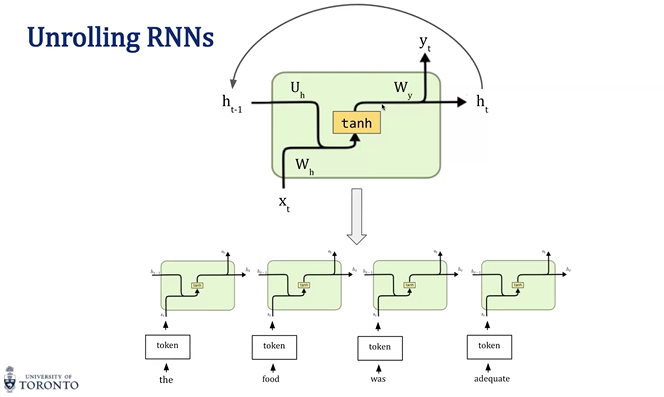

Recall Sequence-Level Predictions, this means making a SINGLE PREDICTION from the whole input. 

However, there are cases where you want to make predictions PER INPUT in the sequence! 

For example, assigning a class per word. Object? Verb? 

What you would do here is, pass each hidden state of each timestep to the classifier.



## The problem with Vanilla RNNs 

What happens to RNNs unrolled onto a long sequence? 
- RNNs can be very DEEP! 

Vanilla RNNs are: 
- Not good at modelling **long-term dependencies** (Direct result of gradient issue)
- Hard to train due to **vanishing/exploding** gradients. 

Suppose update function is a simple linear model. 

$h_t = {W_h}{h_{t-1}}$

For all timesteps this becomes 

$h_t = {(W_h)^t}{h_0}$

The problem is, $h \rightarrow \infty$ if $|W_h| > 1$ (Exploding)

$h \rightarrow 0$ if $|W_h| < 1$

It is impractical to stabilize $W_h$ very close to 1. 

## Possible ways to tackle this? 

- Exploding gradient --> Try gradient clipping 
- Vanishing gradient --> "Skip connections" (too expensive), or we could preserve the hidden state/context over the long term. 

## The key: Gating Mechanism 

This "simulates" skip connections! 

The network is learning to **weight previous states differently**. This can be used to learn to update the context **selectively**. 

Gating mechanism controls **HOW MUCH INFORMATION FLWOS THROUGH**! Suppose X is a vector, then we can control HOW MUCH of X to pass to next step. 

Suppose X is a vector, then we can control how much of X to pass to next step. 

## Long Short-Term Memory (LSTM)

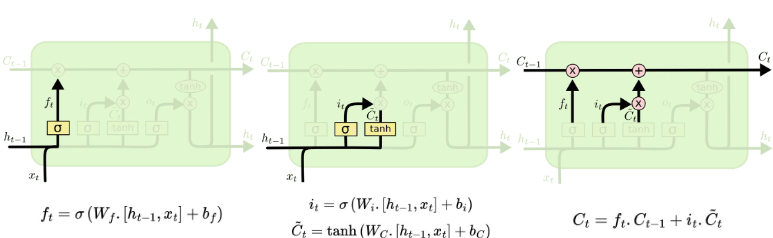

LSTMs consist of a **long-term memory** and a **short-term memory** (context or hidden state)

They use THREE GATES to update the memories. 

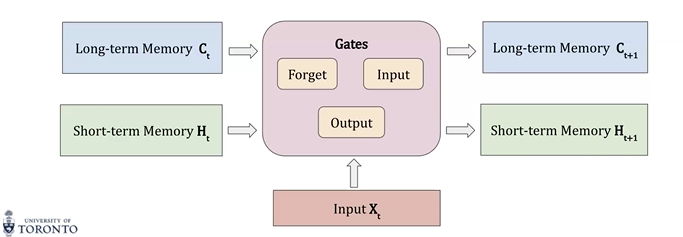

### Forget Gate (Long-term memory)
- How much of the past memory should we forget? 
- Takes in hidden state, input token, and bias

$f_t = \sigma (W_f [h_t, x_t] + b_f )$

Where $W_f$ are the weights for forget gate

### Input Gate (Long-term memory)
- How much of the current input should **CONTRIBUTE TO THE MEMORY?**

$i_t = \sigma (W_i [ h_{t-1}, x_t] + b_i)$

$\tilde{C_t} = tanh(W_C [h_{t-1}, x_t] + b_C)$

### Long-term memory update 
This is the amount of past that is remembered combined with the memory that was just created. 

$C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C_t}$

$f_t$ = Output of forget gate 

$C_{t-1}$ = Previous long term memory 

$i_t$ = Input gate 

$\tilde{C_t}$ = Input information

### Output Gate 
--> How much of the update long-term memory should construct the **short-term memory**? 

$C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C_t}$

$o_t = \sigma (W_o \cdot [h_{t-1}, x_t] + b_o)$

--> This is a number between 0 and 1 

$h_t = o_t \cdot tanh(C_t)$ 

--> This is the final output hidden state of that LSTM cell. 

## Gated Recurrent Unit (GRU)

These are more efficient than LSTMs while having a similar performance. 

There is only a hidden state. 

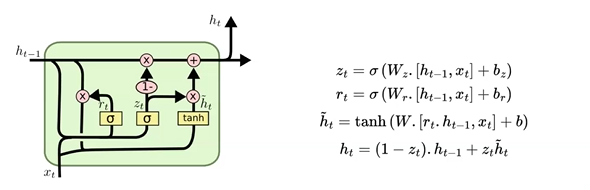

- Combines forget and input gates into an **update gate**

**Update Gate**: Decides how much the previous hidden state and current input should be used to find the new hidden state

- Merges cell state and hidden state

### Performance? 

LSTMs/GRUs can be trained on **longer sequences** and are much better at **learning long-term relationships**. They are **easier to train** and achieve **better performance** than vanilla RNNs. 

## Bidirectional RNNs 

Note that we only had a single layer the whole time, but in deep learning, we often stack layers upon layers! 

A typical state in an RNN relies on the **past and the present**. 

In tasks like machine translation, where a prediction depends on the past, present, and future, we can **exploit the future** to improve performance! 

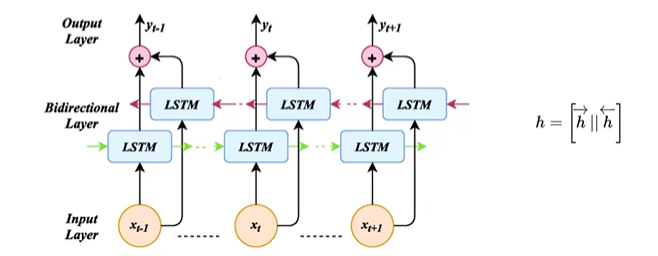

Looking at information flow from **both sides** can give you big gains! 

You can have two parallel RNNs. Take the hidden states of the networks and aggregate/concatenate/sum them. 

## Deep RNNS 
We can also stack RNN layers to learn more abstract representations! 

Representations in first layers are better for **SYNTACTIC** tasks while representations in last layers perform better on **SEMANTIC** tasks. 

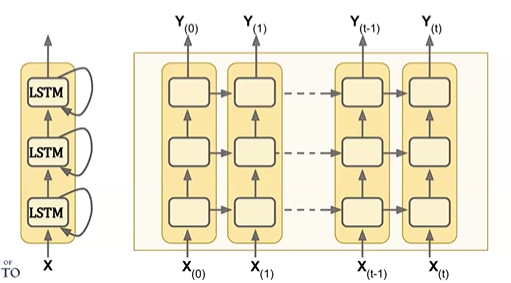

## PyTorch Details

self.rnn = nn.GRU(input_size=64, hidden_size=256, batch_first=True, num_layers=4, bidirectional=True)

Note the amount of hidden states **depend on the AMOUNT OF GRUs**. 

If you do 4 layers with bidirectional, you need 8. 

output, h_n = self.rnn(x, h0)

output = tensor of shape containing the output features from the LAST LAYER of the GRU for each t. This gives you ALL HIDDEN STATES of the last layer. 

h_n = last hidden state of ALL LAYERS. 

## Important: Sequence-to-Sequence RNNs

Learning to generate new sequences rquires addressing some problems: 
- How do we generate VARIABLE-LENGTH sequences? We need to **stop/finish a generated sequence"" 
- Must change training-time behavior 
- Inference-time behavior also changes 

## Augtregressive Learning 
Predict word 1, pass to word 2, pass to word 3, .... until the model stops.

## \<BOS\> and \<EOS\>
Let's use dedicated control symbols to define the BEGINNING OF SEQUENCE and END OF SEQUENCE. 

\<BOS\> I like to eat apples \<EOS\>

Once the RNN generates \<EOS\> we will know it is done generating!

## How to define ground-truth and loss? 

RNNs are trained to generate one particular sequence in the training set. 

- We feed RNN with BOS and compare prediction with "I" through cross entropy 
- Feed it with "I" and compare the prediction with "like"
...
- Feed apples and compare the prediction with EOS

## Teacher-forcing 
In order to making training more efficient, we FORCE THE RNN to stay close to the ground-truth sequence. 

We do this by passing the **ground-truth label** as the next input instead of current prediction. Assume you make the perfect prediction. 

This is because if the first one is screwed up, the rest will be completely screwed as well! 

## Inference? 
We want DIVERSITY in generative model, not deterministic behavior. 

There is NO ACCESS to next word! 

Address by **sampling from predicted distributions** 
- Greedy Search 
- Beam Search 
- Softmax Temperature Scaling 

## Greedy Search 
Select the token with HIGHEST PROBABILITY as the generated token 

Issue: The outputs are not diverse. You are also not looking at joint probability 

## Beam Search 
Look for a sequence of tokens with the **highest probability** withint a window. You branch off a couple of times within that window

This is to try to maximize joint probabilities

## Inference-level temperature 
Softmax Temperature Scaling helps with the **over-confidence** in neural networks by scaling the input logits to the softmax with a temperature. 

**Low Temperature**
- Larger logits, more confident 
- Higher quality samples, less variety 

**High Temperature** 
- Smaller logits, less confident 
- Lower quality samples, more variety 

A large number will get stuffed into the denominator, causing the exponential terms to just approach 1. 

If a small number is stuffed into the denominator, a confident approach will completely dominate!

## Example: Generating Presidential Tweets 

Dataset: ~20,000 Trump Tweets from 2018, at most 140 characters 

